**Question 1**

In [10]:
import math
# Parameters
mu = 42
sigma = 8
# CDF for a normal distribution
def normal_df(x, mu, sigma):
    return 0.5 * (1 + math.erf((x - mu) / (sigma * math.sqrt(2))))
# Probability P
probability = normal_df(30, mu, sigma) - normal_df(20, mu, sigma)
print(f"Probability that a Z-Phone lasts between 20 and 30 months: {probability:.4f}")

Probability that a Z-Phone lasts between 20 and 30 months: 0.0638


**Question 2**


As one component is still functioning at the 100 h cutoff, its true lifetime is unknown and we can't calculate mean without that, so we exclude that oservation and median is taken .This median provides a meaningful lifetime even when some data are censored.

In [11]:
import numpy as np

# Failure times (100+ is dropped)
failures = np.array([75, 63, 36, 51, 45, 80, 90])

median_life = np.median(failures)
print(f"Estimated median life: {median_life} hours")


Estimated median life: 63.0 hours


**Question 3**


In [12]:
import numpy as np
n = 250
sum_x = 11211.00
sum_y = 44520.80
sum_x2 = 543503.00
sum_y2=8110405.02
sum_xy = 1996904.15

(a) Calculating Least squares estimates of slope and intercept

In [14]:
x_bar = sum_x / n
y_bar = sum_y / n
b1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b0 = y_bar - b1 * x_bar
print(f"  Slope: {b1:.4f}")
print(f"  Intercept: {b0:.4f}\n")

  Slope: 0.0101
  Intercept: 177.6284



(b) Predicting the weight that would be obsereved on average for a man age 25

In [15]:
x_new = 25
y_pred = b0 + b1 * x_new
print(f"  Predicted weight: {y_pred:.2f} lbs\n")

  Predicted weight: 177.88 lbs



(c) Computing residual for observed weight of 170 lbs

In [16]:
y_obs = 170
residual = y_obs - y_pred
print(f"  Residual (obs - pred): {residual:.2f} lbs\n")

  Residual (obs - pred): -7.88 lbs



(d) Overestimate or underestimate

The prediction was an overestimate as as residual is negative which shows predicted weight is greater than observed weight

**Question 4**

In [17]:
# Data sets
data1 = np.array([1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91])
data2 = np.array([1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35])

In [18]:
# Mean, Variance and Standard Deviation
mean1 = np.mean(data1)
var1 = np.var(data1, ddof=1)
std1 = np.std(data1, ddof=1)
print(f"  Sample mean:            {mean1:.3f}")
print(f"  Sample variance (ddof=1): {var1:.3f}")
print(f"  Sample std deviation:   {std1:.3f}")

  Sample mean:            2.415
  Sample variance (ddof=1): 0.285
  Sample std deviation:   0.534


/tmp/ipython-input-20-3813568451.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data1, vert=True, labels=['Old'])


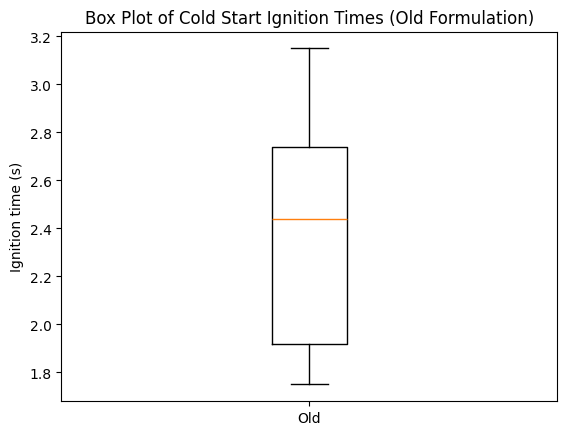

In [20]:
# Box plot for dataset1
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(data1, vert=True, labels=['Old'])
plt.ylabel('Ignition time (s)')
plt.title('Box Plot of Cold Start Ignition Times (Old Formulation)')
plt.show()

/tmp/ipython-input-21-1868074250.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], vert=True, labels=['Old', 'New'])


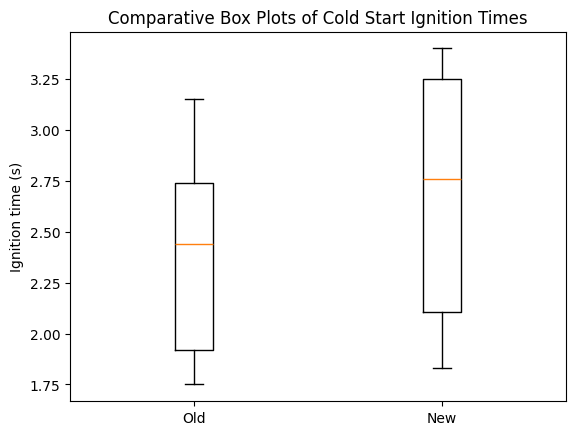

In [21]:
# Comparative box plots for data1 and data2
plt.figure()
plt.boxplot([data1, data2], vert=True, labels=['Old', 'New'])
plt.ylabel('Ignition time (s)')
plt.title('Comparative Box Plots of Cold Start Ignition Times')
plt.show()

**Observation**

The new formulation clearly takes longer, on average, to ignite: its median cold‑start time (≈2.75 s) exceeds the old fuel’s (≈2.45 s). It also shows more spread, with both slower “worst‑case” starts and a wider middle 50% range. The old fuel not only lights faster on average but does so more consistently. These differences suggest the new blend sacrifices speed and reliability of start-up.

**Question 5**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

(a) Generate data and split into 80/20

In [23]:
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
noise = np.random.normal(0, 1, size=(n_samples, 1))
y = 3 * X + 2 + noise  # true model y = 3x + 2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
print(f"  Training samples: {len(X_train)}, Testing samples: {len(X_test)}\n")

  Training samples: 80, Testing samples: 20



(b) Using Linear Regression for training half and computing MSE

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"MSE: {mse_lin:.3f}\n")

MSE: 1.233



(c) Plotting Model along with data

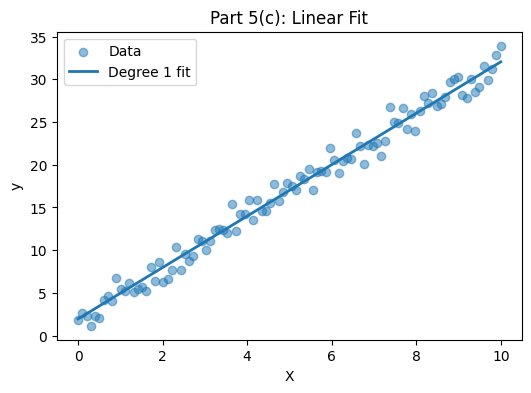

In [25]:
plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.5, label="Data")
x_plot = np.linspace(0, 10, 100).reshape(-1,1)
plt.plot(x_plot, linreg.predict(x_plot), label="Degree 1 fit", linewidth=2)
plt.title("Part 5(c): Linear Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

(d) Polynomials of Degrees 2 and 3

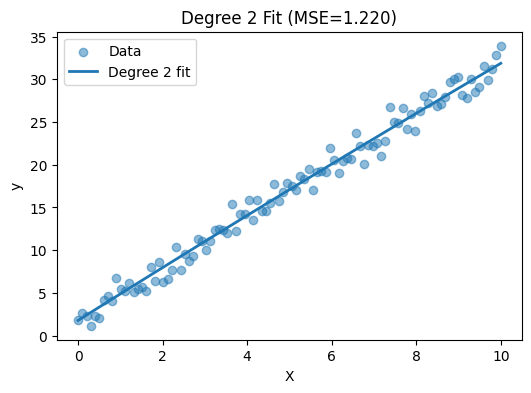

 Degree 2 test MSE: 1.220


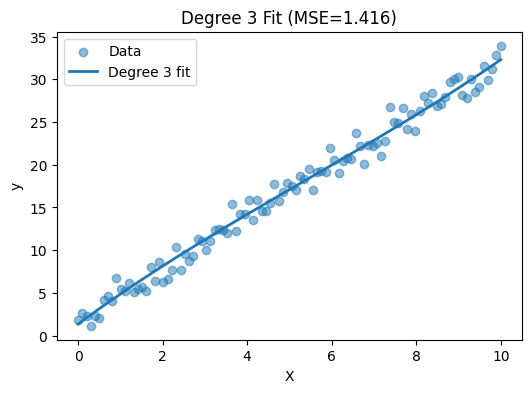

 Degree 3 test MSE: 1.416


In [26]:
for deg in [2, 3]:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, alpha=0.5, label="Data")
    x_plot_poly = poly.transform(x_plot)
    plt.plot(x_plot, model.predict(x_plot_poly), linewidth=2, label=f"Degree {deg} fit")
    plt.title(f"Degree {deg} Fit (MSE={mse:.3f})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    print(f" Degree {deg} test MSE: {mse:.3f}")